In [1]:
import numpy as np
import scipy.spatial.distance as distance
from matplotlib import pylab
from sklearn.manifold import TSNE

%matplotlib inline

In [2]:
data = np.load('saves/embeddings_cbow_weighted.npy')

In [3]:
embeddings = data[()]['embeddings']
idx_to_game = data[()]['idx_to_game']
game_to_idx = data[()]['game_to_idx']

In [4]:
def closest(u, count=8):
    closest = []
    for idx, game in enumerate(idx_to_game):
        closest.append((idx, distance.cosine(u, embeddings[idx])))

    return [(idx_to_game[x[0]], x[1]) for x in sorted(closest, key=lambda t: t[1])][:count]

def closest_to_game(game, count=8):
    return closest(embeddings[game_to_idx[game]], count)

def game_distance(a, b):
    return distance.cosine(embeddings[game_to_idx[a]], embeddings[game_to_idx[b]])

In [5]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, metric='cosine')
two_d_embeddings = tsne.fit_transform(embeddings[1:num_points+1, :])

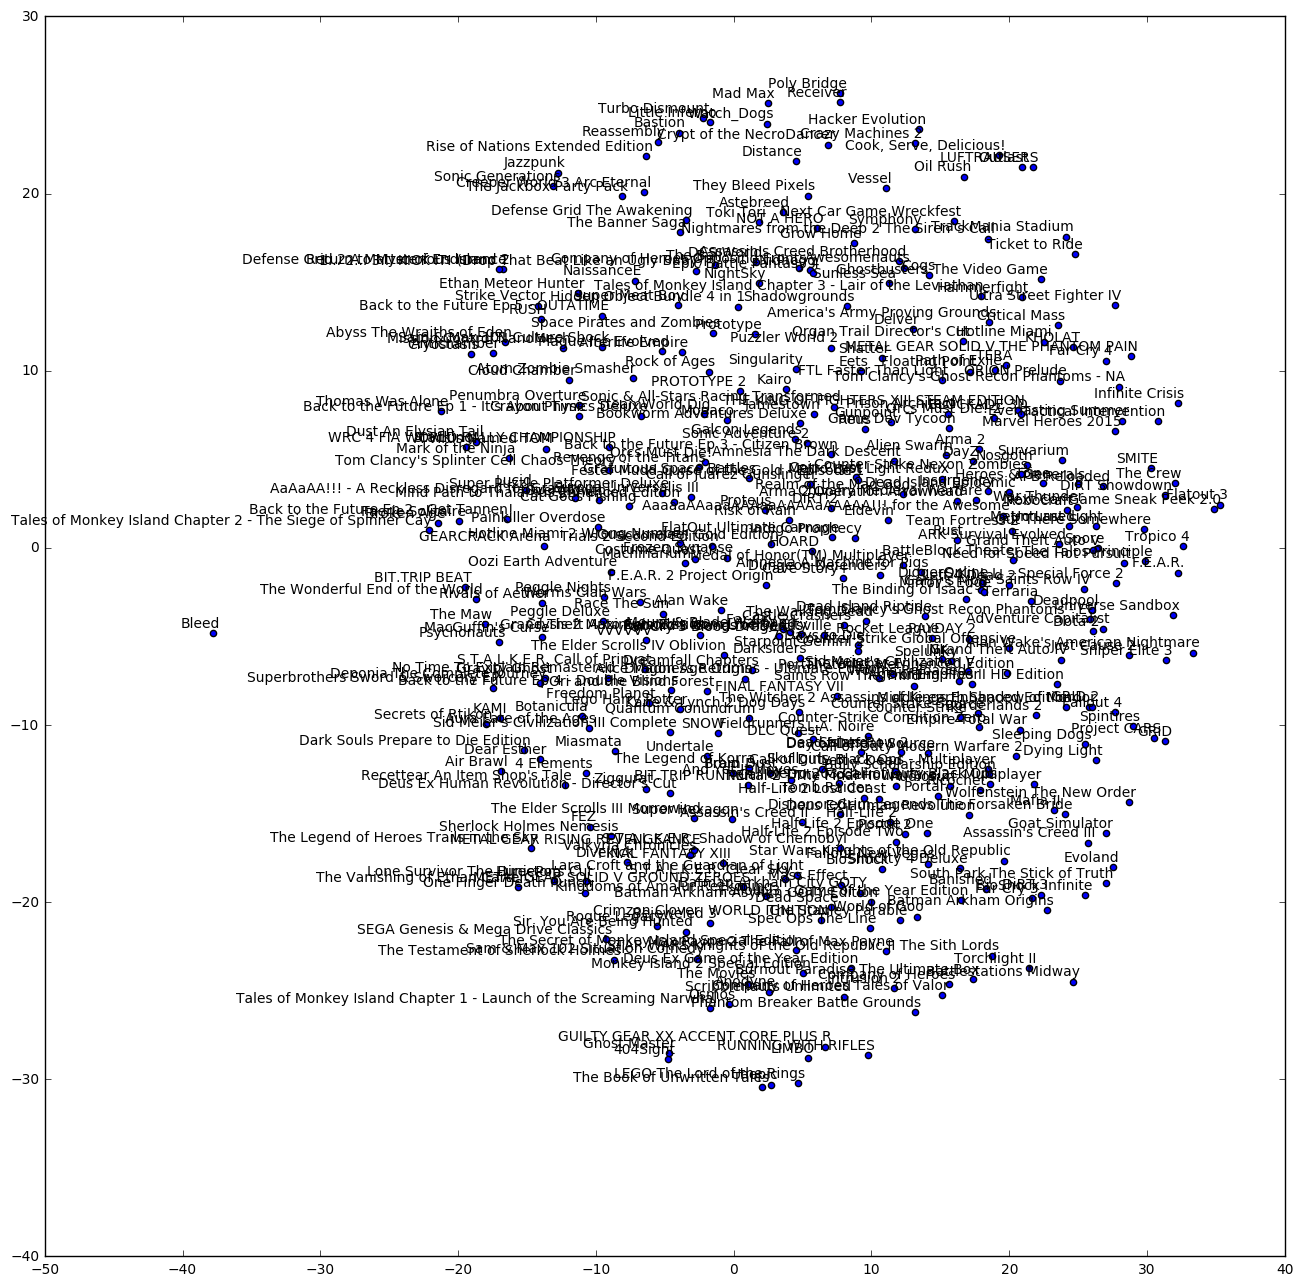

In [6]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(16, 16))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i, :]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [idx_to_game[i] for i in range(1, num_points + 1)]
plot(two_d_embeddings, words)

In [7]:
print('Cosine: {}'.format(distance.cosine(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))
print('Euclidean: {}'.format(distance.euclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))
print('Squared eucliedean: {}'.format(distance.sqeuclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))
print('Correlation: {}'.format(distance.correlation(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))

Cosine: 0.5177717794315913
Euclidean: 1.017616629600525
Squared eucliedean: 1.0355435609817505
Correlation: 0.5131566326862405


In [8]:
print('Cosine: {}'.format(distance.cosine(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))
print('Euclidean: {}'.format(distance.euclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))
print('Squared eucliedean: {}'.format(distance.sqeuclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))
print('Correlation: {}'.format(distance.correlation(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))

Cosine: 0.6965808634065552
Euclidean: 1.1803227663040161
Squared eucliedean: 1.3931618928909302
Correlation: 0.6972209186916885


In [9]:
closest_to_game('Counter-Strike Global Offensive', 8)

[('Counter-Strike Global Offensive', 0.0),
 ('Rocket League', 0.44389504863082785),
 ('Trove', 0.44937753677368164),
 ("Garry's Mod", 0.45249390035794979),
 ('Dota 2', 0.45899432897567749),
 ('Team Fortress 2', 0.47106194496154785),
 ('Arma 2 Operation Arrowhead', 0.47667929391141495),
 ('Loadout', 0.49158060450322683)]

In [10]:
closest_to_game('Football Manager 2016', 16)

[('Football Manager 2016', -2.384185791015625e-07),
 ('Football Manager 2015', 0.57161909341812134),
 ('Out of the Park Baseball 15', 0.59060797095298767),
 ('New Star Soccer 5', 0.63765767216682434),
 ('OMSI 2', 0.63882495627700764),
 ('Football Manager 2014', 0.64431525136919321),
 ("Sid Meier's Civilization V", 0.65701207518577576),
 ('Football Tactics', 0.66129189729690552),
 ('Call of Duty Modern Warfare 2', 0.66721683740615845),
 ('GoD Factory Wingmen', 0.66907954216003418),
 ('The Forest', 0.67916995286941528),
 ('Football Manager 2010', 0.68573978543281555),
 ('NEED FOR MADNESS ?', 0.68632963299751282),
 ('Might & Magic Heroes VII ', 0.68886719279689745),
 ('Haunted Memories', 0.69180135082014504),
 ('KWAAN', 0.69405410360645015)]

In [11]:
closest_to_game('Batman Arkham Asylum GOTY Edition')

[('Batman Arkham Asylum GOTY Edition', 0.0),
 ('SanctuaryRPG Black Edition', 0.57038006605983171),
 ('Batman Arkham City GOTY', 0.58422058820724487),
 ('BioShock', 0.60694614690221238),
 ('Spec Ops The Line', 0.62867573670600274),
 ("Assassin's Creed II", 0.63386178016662598),
 ('Half-Life', 0.63924745555206863),
 ('Let the Cat In', 0.64212830568889445)]

In [12]:
game_distance('Grand Theft Auto V', 'Football Manager 2016')

0.85459381965361947

In [13]:
closest(embeddings[game_to_idx['Team Fortress 2']] - embeddings[game_to_idx['Counter-Strike']], 16)

[('Team Fortress 2', 0.47882619387395431),
 ('Trove', 0.6650926548797863),
 ('Everlasting Summer', 0.68069935504608425),
 ('SONIC THE HEDGEHOG 4 Episode II', 0.69754153378273132),
 ('Supreme Ruler 2020 Gold', 0.70772658903765095),
 ('Navy Field 2  Conqueror of the Ocean', 0.7091150164355593),
 ('Greyfox', 0.72182166749048415),
 ('Empires', 0.72779536695111824),
 ('Survival Postapocalypse Now', 0.72821173314351606),
 ('Serious Sam Double D XXL', 0.72972683092984569),
 ('Kingdom Wars', 0.72975701996581366),
 ('Gravilon', 0.73218690036398171),
 ('BLOCKADE 3D', 0.73471996458834865),
 ('Dungeon Defenders II', 0.73975691260616616),
 ('Command and Conquer 3 Tiberium Wars', 0.7418510401486943),
 ('System Protocol One', 0.74593986042514859)]

In [14]:
closest(embeddings[game_to_idx['Counter-Strike']] - embeddings[game_to_idx['Team Fortress 2']], 16)

[('Counter-Strike', 0.47882614163657011),
 ('Day of Defeat', 0.71419121517007511),
 ('Counter-Strike Condition Zero', 0.72253754240410917),
 ('Counter-Strike Condition Zero Deleted Scenes', 0.76214245424725002),
 ('Gigantic Army', 0.76338349851998766),
 ('FINAL FANTASY XIII', 0.77051674276986792),
 ('Ittle Dew', 0.78136528569846553),
 ('Survivor Squad', 0.78529570969113593),
 ('Paper Sorcerer', 0.78692149598700611),
 ('Silent Hunter III', 0.78906917963426793),
 ("Sid Meier's Civilization IV", 0.78938941742569568),
 ('Midnight Mysteries Salem Witch Trials', 0.79122377898695839),
 ('Hitman Absolution', 0.79557223731982474),
 ('Meridian New World', 0.7961035066869927),
 ('F1 2010', 0.79804867903666188),
 ('Ori and the Blind Forest', 0.80426708109909528)]

In [15]:
closest(embeddings[game_to_idx['Dota 2']] - embeddings[game_to_idx['Counter-Strike']], 8)

[('Dota 2', 0.46097359345482503),
 ('SONIC THE HEDGEHOG 4 Episode II', 0.65767495370085727),
 ('Blood of the Werewolf', 0.70437837829990868),
 ('Survival Postapocalypse Now', 0.70797996188144152),
 ('Convoy', 0.71665016529978653),
 ('The Political Machine', 0.72263302682497355),
 ('Toribash', 0.72627213668421886),
 ('AdVenture Capitalist', 0.72755202529870033)]